### Q. Create a logistic Decision Tree on the basis of 'Temperature', 'Skin', 'Birth', 'Creature', 'Has legs', 'Hibernates', and 'Class' of the given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Species.csv')
df

,Name,Body Temp,Skin Cover,Gives Birth,Aquatic Creature,Aerial Creature,Has legs,Hibernates,Class
0,Human,Warm,hair,1,0,0,1,0,Mammal
1,Python,Cold,scales,0,0,0,0,1,Reptile
2,Salmon,Cold,scales,0,1,0,0,0,Fish
3,Whale,Warm,hair,1,1,0,0,0,Mammal
4,Frog,Cold,none,0,2,0,1,1,Amphibian
5,Komodo,Cold,scales,0,0,0,1,0,Reptile
6,Bat,Warm,hair,1,0,1,1,1,Mammal
7,Pigeon,Warm,feathers,0,0,1,1,0,Bird
8,Cat,Warm,fur,1,0,0,1,0,Mammal
9,Leopard,Cold,scales,1,1,0,0,0,Fish


In [3]:
df.shape

(15, 9)

In [4]:
df.columns

Index(['Name', 'Body Temp', 'Skin Cover', 'Gives Birth', 'Aquatic Creature',
       'Aerial Creature', 'Has legs', 'Hibernates', 'Class'],
      dtype='object')

In [5]:
df.drop(['Name'],axis=1,inplace = True)

In [6]:
df.rename(columns={'Body Temp':'Temperature','Skin Cover':'Skin','Aquatic Creature':'Aquatic',
                  'Aerial Creature':'Aerial'},inplace=True)

In [7]:
df['Temperature'].value_counts()

Cold    8
Warm    7
Name: Temperature, dtype: int64

In [8]:
df.Temperature = df.Temperature.replace({'Warm':1,'Cold':0})

In [9]:
df['Skin'].value_counts()

scales      6
hair        3
none        2
feathers    2
fur         1
quills      1
Name: Skin, dtype: int64

In [10]:
df.Skin = df.Skin.replace({'scales':1,'hair':2,'none':3,'feathers':4,'fur':5,'quills':1})

In [11]:
df.dtypes

Temperature     int64
Skin            int64
Gives Birth     int64
Aquatic         int64
Aerial          int64
Has legs        int64
Hibernates      int64
Class          object
dtype: object

In [12]:
df.head()

,Temperature,Skin,Gives Birth,Aquatic,Aerial,Has legs,Hibernates,Class
0,1,2,1,0,0,1,0,Mammal
1,0,1,0,0,0,0,1,Reptile
2,0,1,0,1,0,0,0,Fish
3,1,2,1,1,0,0,0,Mammal
4,0,3,0,2,0,1,1,Amphibian


In [13]:
df.tail()

,Temperature,Skin,Gives Birth,Aquatic,Aerial,Has legs,Hibernates,Class
10,0,1,0,2,0,1,0,Reptile
11,1,4,0,2,0,1,0,Bird
12,1,1,1,0,0,1,1,Mammal
13,0,1,0,1,0,0,0,Fish
14,0,3,0,2,0,1,1,Amphibian


In [14]:
df.describe()

,Temperature,Skin,Gives Birth,Aquatic,Aerial,Has legs,Hibernates
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.466667,2.133333,0.400000,0.800000,0.133333,0.666667,0.333333
std,0.516398,1.355764,0.507093,0.861892,0.351866,0.487950,0.487950
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,1.000000,1.500000,0.000000,1.000000,1.000000
max,1.000000,5.000000,1.000000,2.000000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Temperature  15 non-null     int64 
 1   Skin         15 non-null     int64 
 2   Gives Birth  15 non-null     int64 
 3   Aquatic      15 non-null     int64 
 4   Aerial       15 non-null     int64 
 5   Has legs     15 non-null     int64 
 6   Hibernates   15 non-null     int64 
 7   Class        15 non-null     object
dtypes: int64(7), object(1)
memory usage: 1.1+ KB


In [16]:
df.columns

Index(['Temperature', 'Skin', 'Gives Birth', 'Aquatic', 'Aerial', 'Has legs',
       'Hibernates', 'Class'],
      dtype='object')

In [17]:
x= df[['Temperature','Skin','Gives Birth','Aquatic','Aerial','Has legs','Hibernates']].values

In [18]:
x

array([[1, 2, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1],
       [0, 1, 0, 1, 0, 0, 0],
       [1, 2, 1, 1, 0, 0, 0],
       [0, 3, 0, 2, 0, 1, 1],
       [0, 1, 0, 0, 0, 1, 0],
       [1, 2, 1, 0, 1, 1, 1],
       [1, 4, 0, 0, 1, 1, 0],
       [1, 5, 1, 0, 0, 1, 0],
       [0, 1, 1, 1, 0, 0, 0],
       [0, 1, 0, 2, 0, 1, 0],
       [1, 4, 0, 2, 0, 1, 0],
       [1, 1, 1, 0, 0, 1, 1],
       [0, 1, 0, 1, 0, 0, 0],
       [0, 3, 0, 2, 0, 1, 1]], dtype=int64)

In [19]:
y=df['Class']

In [20]:
y.value_counts()

Mammal       5
Reptile      3
Fish         3
Amphibian    2
Bird         2
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model = DecisionTreeClassifier()

In [25]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [26]:
y_pred = model.predict(x_test)

In [27]:
y_pred

array(['Fish', 'Amphibian', 'Bird', 'Mammal', 'Mammal'], dtype=object)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)*100

80.0

In [30]:
new_df= pd.DataFrame({'actual':y_test,'predicted':y_pred})

In [31]:
new_df

,actual,predicted
13,Fish,Fish
14,Amphibian,Amphibian
11,Bird,Bird
8,Mammal,Mammal
9,Fish,Mammal


In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
performance = confusion_matrix(y_test,y_pred)

In [34]:
performance

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 1],
       [0, 0, 0, 1]], dtype=int64)

In [35]:
from sklearn.metrics import plot_confusion_matrix

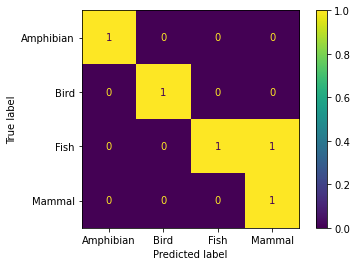

In [36]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

In [37]:
cross = pd.crosstab(new_df['actual'],new_df['predicted'], rownames=['Actual'], colnames=['Predicted']) 

In [38]:
cross

Predicted,Amphibian,Bird,Fish,Mammal
Actual,,,,
Amphibian,1,0,0,0
Bird,0,1,0,0
Fish,0,0,1,1
Mammal,0,0,0,1


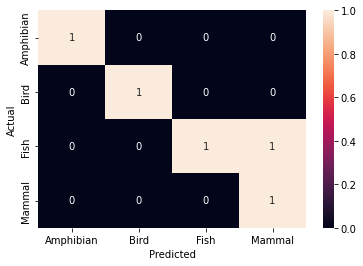

In [39]:
sns.heatmap(cross,annot = True)
plt.show()

In [40]:
from sklearn import tree

In [41]:
feature_name= ['Temperature','Skin','Gives Birth','Aquatic','Aerial','Has legs','Hibernates']

In [42]:
feature_name

['Temperature',
 'Skin',
 'Gives Birth',
 'Aquatic',
 'Aerial',
 'Has legs',
 'Hibernates']

In [43]:
type(feature_name)

list

In [44]:
class_name = ['Amphibian','Fish','Mammal','Reptile','Bird']

In [45]:
class_name

['Amphibian', 'Fish', 'Mammal', 'Reptile', 'Bird']

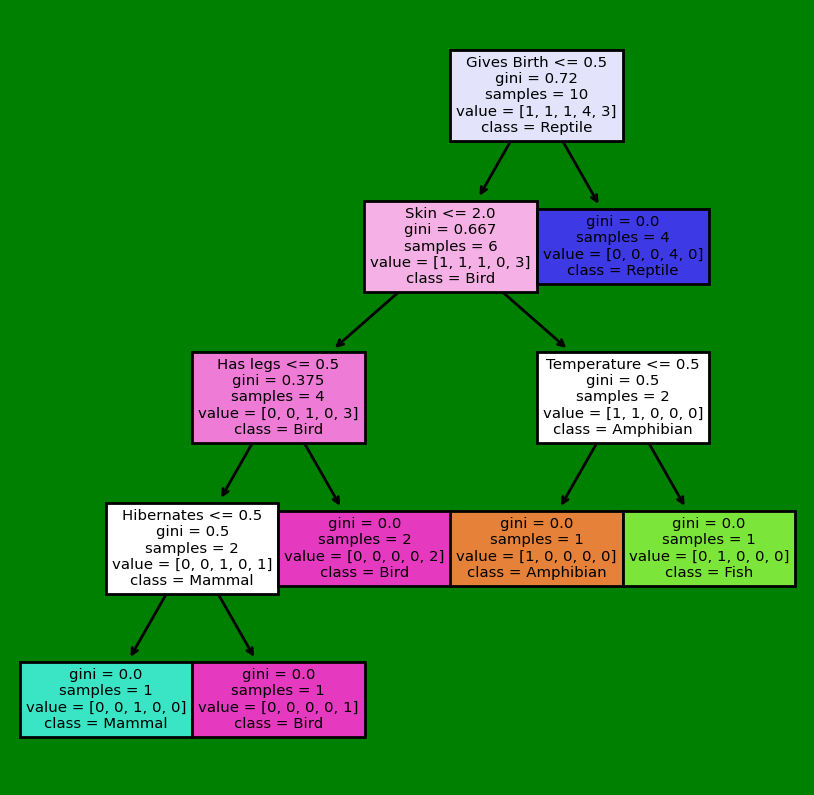

In [46]:
fig,ax= plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=200, facecolor='g')
tree.plot_tree(model,feature_names=feature_name, class_names=class_name, filled=True)
plt.show()